Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Isac Ingfeldt"
COLLABORATORS = ""

---

# Welcome to ExtLibraries!

For these exercises, please make sure that you install the libraries before starting jupyter notebook. If you installed jupyter in a separate virtual environment these libraries have to be installed in the same virtual environment so don't forget to activate that first, e.g.

```linux
$ source ~/venv/bin/activate
(venv) $ pip install pandas
(venv) $ pip install matplotlib
```

## Exercise 1

(a) Consider the out_top1000.csv list of most popular names per year since 1880 (the file can be pulled from our repository). Make a plot "Births_1880-2010.png" of the total sum of births through the years.

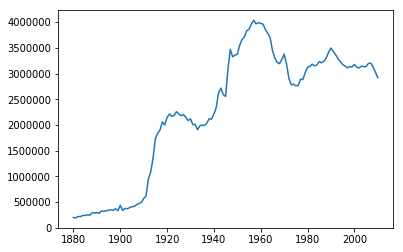

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('out_top1000.csv')
#print(df)
births = df.groupby(['year'])['births'].sum().values.tolist()
#print(births)
year = list(set(df.year))
birthsum =[]
for item in births:
    birthsum.append(item)
yearlist = []
for item in year:
    yearlist.append(item)
plt.plot(yearlist,birthsum)
plt.savefig('Births_1880-2010.png')

In [2]:
import os.path
assert os.path.isfile("Births_1880-2010.png")==True


(b) Extract all the entries with 'Donald' from the list and plot the propensity through the years in a figure "Donald_propensity.png". (The fast fluctuations back to zero between 1920 and 1945 are due to mistakes in the basis data)

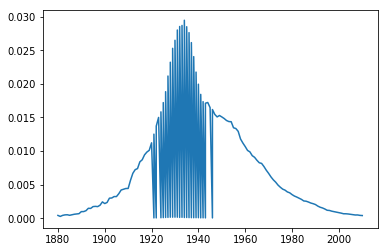

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('out_top1000.csv')
donalds = df.loc[df['name'] == 'Donald']
prop = donalds['prop'].values.tolist()
years = donalds['year'].values.tolist()
plt.plot(years,prop)
plt.savefig('Donald_propensity.png')


In [6]:
import os.path
assert os.path.isfile("Donald_propensity.png")==True

## Exercise 2

Write a program which analyses files in pdb format (file: 3IE9.pdb). The program ignores the coordinates of the atoms of the protein molecule (lines starting with "ATOM") and puts the coordinates of all other atoms (lines starting with "HETATM") in a dataframe 'df_other' with columns 'ATOM', 'X', 'Y' and 'Z'. Print finally this dataframe to a file '3IE9.extra_info' (information separated by a space) and please check in an extra column whether ('True'/'False') the atom under consideration is Oxygen or not.

In [4]:
from biopandas.pdb import PandasPdb
import matplotlib.pyplot as plt
import pandas as pd

ppdb = PandasPdb().fetch_pdb('3IE9')
new_file = open('3IE9.extra_info', 'w')
heatatmdf = ppdb.df['HETATM']
df_other = heatatmdf[['atom_number', 'x_coord', 'y_coord', 'z_coord']].copy()
df_other.columns = ['Atom', 'X', 'Y', 'Z']
df_other.to_csv('3IE9.extra_info', sep='\t')
#print(df_other)


In [5]:
value1=pd.Index(df_other.Atom).get_loc('CU')
assert value1==pd.Index(df_other.Z).get_loc('-7.489')
assert df_other.loc[value1,'Oxygen'] == False
value2=pd.Index(df_other.Y).get_loc('1.151')
assert value2==pd.Index(df_other.X).get_loc('-50.638')
assert df_other.loc[value2,'Oxygen'] == True

KeyError: 'CU'

## Exercise 3

Write a program which writes out the absolute 'Sum of electronic and thermal Enthalpies' values in Hartree for all considered temperatures (1, 20, 40, 60,...480 K) in the inputfile 'Laurdan_0_va.log'. The outputfile should be called 'Exercise_3_output'; the data are separated by a space. 

In an extra column, put the relative energies (= the values of the previous column - the minimal value of that column) in kcal/mol. Round the values to four decimals. 

Print in a file 'statistics' the average value and standard deviations of these relative energies calculated using numpy: 'The average is ... kcal/mol' and on the next line 'The standard deviation is ... kcal/mol'.

Make a cumulative sum of all the relative values, put it in an extra column. In this way, the output file will have four columns: 'temperature, 'H', 'rH' and 'rH_cums'.

Prepare a graph of this new column in function of the temperature. In this graph ('Cumulative_rel_values.png'), please put the unit at the X- and Y-axis (K and kcal/mol, respectively). Make use of a dashed (--) red line and give the graph the title 'Cumulative relative enthalpies'. Set x-ticks starting from 0 K to 480 K, with steps of 40 K. Put the legend in the lower right corner.     

In [ ]:
# YOUR CODE HERE

In [ ]:
import re
alldata_ex3 = pd.read_csv('Exercise_3_output', sep=' ')
value1=pd.Index(alldata_ex3.temperature).get_loc(380.0)
assert round(alldata_ex3.rH[value1],2)==28.39
for i in range(1,24):
    assert round(alldata_ex3.rH_cums[i]-alldata_ex3.rH_cums[i-1],2) == round( alldata_ex3.rH[i],2)
Fs=open("statistics",'r')
lines = Fs.readlines()
Fs.close()
svalue=lines[0].split()[3]
avvalue=float(svalue)
assert round(avvalue,2) == 15.96
svalue = lines[1].split()[4]
avvalue=float(svalue)
assert round(avvalue,2) == 13.36